In [1]:
import pandas as pd
df = pd.read_excel("resources/mean median mode.xlsx")
df.head()

,age,department,employee_number,gender,job_level,marital_status,over_time,performance_rating,totalW_working_years,training_times_last_year,years_since_last_promotion,years_with_curr_manager,monthly_income,salary_2017,salary_2018,year_of_joining,last_role_change,percent_hike
0,41,Sales,1,Female,2,Single,Yes,3,8,0,0,5,5993,71916,79826.76,2012,2014,11
1,49,Research & Development,2,Male,2,Married,No,4,10,3,1,7,5130,61560,75718.80,2008,2011,23
2,37,Research & Development,4,Male,1,Single,Yes,3,7,3,0,0,2090,25080,28842.00,2018,2018,15
3,33,Research & Development,5,Female,1,Married,Yes,3,8,3,3,0,2909,34908,38747.88,2010,2011,11
4,27,Research & Development,7,Male,1,Married,No,3,6,3,2,2,3468,41616,46609.92,2016,2016,12


In [2]:
df["Tenure"] =2020-df["year_of_joining"]
df["Tenure"]

0        8
1       12
2        2
3       10
4        4
        ..
1465     7
1466     9
1467     8
1468    11
1469     6
Name: Tenure, Length: 1470, dtype: int64

In [3]:
df["Tenure"].describe()

count    1470.000000
mean        9.008163
std         6.126525
min         2.000000
25%         5.000000
50%         7.000000
75%        11.000000
max        42.000000
Name: Tenure, dtype: float64

<h3> Dummy Variable </h3>
컴퓨터가 읽을 수 없는 변수를 바이너리 변수로 바꾸는 것. (여자 => 1, 남자 => 0) <p>
원칙 : 한 개 변수에 n개의 카테고리가 있으면 n-1 변수로 전환.

In [4]:
df["department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: department, dtype: int64

In [5]:
import numpy as np
df["hr_dummy"] = np.where(df["department"] == "Human Resources",1,0)
df["sales_dummy"] = np.where(df["department"] == "Sales",1,0)
df.head()

,age,department,employee_number,gender,job_level,marital_status,over_time,performance_rating,totalW_working_years,training_times_last_year,...,years_with_curr_manager,monthly_income,salary_2017,salary_2018,year_of_joining,last_role_change,percent_hike,Tenure,hr_dummy,sales_dummy
0,41,Sales,1,Female,2,Single,Yes,3,8,0,...,5,5993,71916,79826.76,2012,2014,11,8,0,1
1,49,Research & Development,2,Male,2,Married,No,4,10,3,...,7,5130,61560,75718.80,2008,2011,23,12,0,0
2,37,Research & Development,4,Male,1,Single,Yes,3,7,3,...,0,2090,25080,28842.00,2018,2018,15,2,0,0
3,33,Research & Development,5,Female,1,Married,Yes,3,8,3,...,0,2909,34908,38747.88,2010,2011,11,10,0,0
4,27,Research & Development,7,Male,1,Married,No,3,6,3,...,2,3468,41616,46609.92,2016,2016,12,4,0,0


In [6]:
df["hr_dummy"].value_counts()  

0    1407
1      63
Name: hr_dummy, dtype: int64

In [7]:
df = df.drop(["hr_dummy","sales_dummy"],axis = 1)
df.columns

Index(['age', 'department', 'employee_number', 'gender', 'job_level',
       'marital_status', 'over_time', 'performance_rating',
       'totalW_working_years', 'training_times_last_year',
       'years_since_last_promotion', 'years_with_curr_manager',
       'monthly_income', 'salary_2017', 'salary_2018', 'year_of_joining',
       'last_role_change', 'percent_hike', 'Tenure'],
      dtype='object')

In [8]:
df = pd.get_dummies(df)

In [9]:
df.head()

,age,employee_number,job_level,performance_rating,totalW_working_years,training_times_last_year,years_since_last_promotion,years_with_curr_manager,monthly_income,salary_2017,...,department_Human Resources,department_Research & Development,department_Sales,gender_Female,gender_Male,marital_status_Divorced,marital_status_Married,marital_status_Single,over_time_No,over_time_Yes
0,41,1,2,3,8,0,0,5,5993,71916,...,0,0,1,1,0,0,0,1,0,1
1,49,2,2,4,10,3,1,7,5130,61560,...,0,1,0,0,1,0,1,0,1,0
2,37,4,1,3,7,3,0,0,2090,25080,...,0,1,0,0,1,0,0,1,0,1
3,33,5,1,3,8,3,3,0,2909,34908,...,0,1,0,1,0,0,1,0,0,1
4,27,7,1,3,6,3,2,2,3468,41616,...,0,1,0,0,1,0,1,0,1,0


In [10]:
df.apply(pd.Series.value_counts)

,age,employee_number,job_level,performance_rating,totalW_working_years,training_times_last_year,years_since_last_promotion,years_with_curr_manager,monthly_income,salary_2017,...,department_Human Resources,department_Research & Development,department_Sales,gender_Female,gender_Male,marital_status_Divorced,marital_status_Married,marital_status_Single,over_time_No,over_time_Yes
0.00,NaN,NaN,NaN,NaN,11.0,54.0,581.0,263.0,NaN,NaN,...,1407.0,509.0,1024.0,882.0,588.0,1143.0,797.0,1000.0,416.0,1054.0
1.00,NaN,1.0,543.0,NaN,81.0,71.0,357.0,76.0,NaN,NaN,...,63.0,961.0,446.0,588.0,882.0,327.0,673.0,470.0,1054.0,416.0
2.00,NaN,1.0,534.0,NaN,31.0,547.0,159.0,344.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.00,NaN,NaN,218.0,1244.0,42.0,491.0,52.0,142.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.00,NaN,1.0,106.0,226.0,63.0,123.0,61.0,98.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284388.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286058.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287134.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292404.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = df.drop(["gender_Male","department_Research & Development","marital_status_Married","over_time_No"],axis = 1)
df.head()

,age,employee_number,job_level,performance_rating,totalW_working_years,training_times_last_year,years_since_last_promotion,years_with_curr_manager,monthly_income,salary_2017,...,year_of_joining,last_role_change,percent_hike,Tenure,department_Human Resources,department_Sales,gender_Female,marital_status_Divorced,marital_status_Single,over_time_Yes
0,41,1,2,3,8,0,0,5,5993,71916,...,2012,2014,11,8,0,1,1,0,1,1
1,49,2,2,4,10,3,1,7,5130,61560,...,2008,2011,23,12,0,0,0,0,0,0
2,37,4,1,3,7,3,0,0,2090,25080,...,2018,2018,15,2,0,0,0,0,1,1
3,33,5,1,3,8,3,3,0,2909,34908,...,2010,2011,11,10,0,0,1,0,0,1
4,27,7,1,3,6,3,2,2,3468,41616,...,2016,2016,12,4,0,0,0,0,0,0


<h3> Normalization

In [12]:
df = pd.read_excel("resources/skewness.xlsx")

In [13]:
df.head()

,manager_sat,employee_sat,salary_2017,percent_salary_hike,age
0,81,80,119968,0.952381,41
1,88,84,99330,1.818182,49
2,83,93,102511,1.739130,37
3,86,83,56674,1.666667,33
4,79,80,122021,2.400000,27


In [14]:
df["salary_2017"]

0      119968
1       99330
2      102511
3       56674
4      122021
        ...  
681     74999
682     74999
683     74999
684     74999
685     74000
Name: salary_2017, Length: 686, dtype: int64

In [15]:
df["salary_2017"].describe()

count       686.000000
mean     114289.116618
std       60820.924620
min       39600.000000
25%       77033.750000
50%       98000.000000
75%      125705.500000
max      511500.000000
Name: salary_2017, dtype: float64

In [16]:
#min-max normalization
df["salary_2017_norm"] = (df["salary_2017"]-df["salary_2017"].min())/(df["salary_2017"].max()-df["salary_2017"].min())

In [17]:
df.head()

,manager_sat,employee_sat,salary_2017,percent_salary_hike,age,salary_2017_norm
0,81,80,119968,0.952381,41,0.170307
1,88,84,99330,1.818182,49,0.126573
2,83,93,102511,1.739130,37,0.133314
3,86,83,56674,1.666667,33,0.036181
4,79,80,122021,2.400000,27,0.174658


In [18]:
df["salary_2017_norm"].min()

0.0

In [19]:
df["salary_2017_norm"].max()

1.0

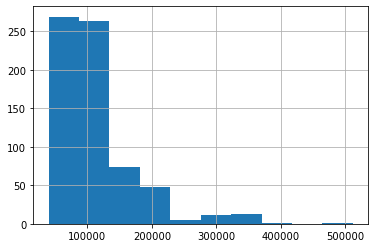

In [20]:
df["salary_2017"].hist()

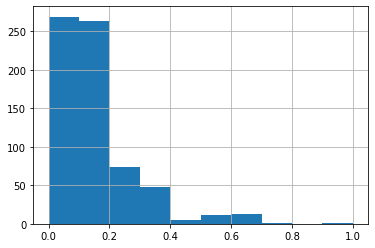

In [21]:
df["salary_2017_norm"].hist()

<h3> Log Transformation </h3><p>
    로그 트랜스포메이션은 데이터가 Right Skewed 되었을 때 사용한다.

In [22]:
df = pd.read_excel("resources/incentive.xlsx")
df.head()

,employee_number,incentive
0,1,278.5
1,2,271.0
2,3,209.5
3,4,208.0
4,5,198.0


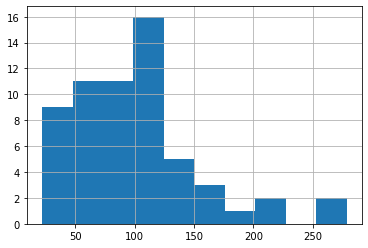

In [23]:
df["incentive"].hist()

In [29]:
#로그 정규화 시작
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([ 22. ,  29.5,  33. ,  40. ,  45.5,  46. ,  47. ,  47. ,  47.5,
          50. ,  51.5,  53.5,  53.5,  

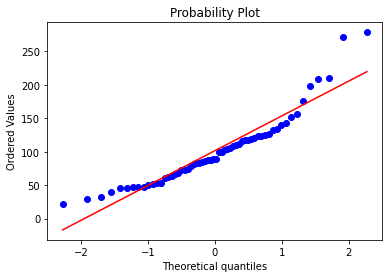

In [31]:
#정규분포 여부를 보기위한 시각화
stats.probplot(df["incentive"],dist="norm",plot=plt)

In [32]:
# Shapiro-Wilk test for normality
# p-value 가 0.05 보다 낮으므로 귀무가설 기각 => 데이터는 정규화 되어 있지 않다.
stats.shapiro(df["incentive"])

ShapiroResult(statistic=0.9010933637619019, pvalue=0.00014420412480831146)

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([3.09104245, 3.38439026, 3.49650756, 3.68887945, 3.81771233,
         3.8286414 , 3.8501476 , 3.850147

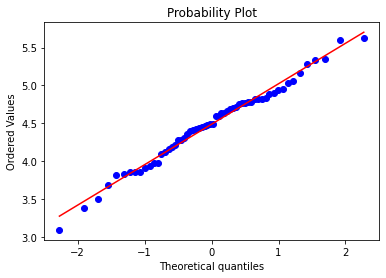

In [33]:
# log Transformation 실행 및 p-value 측정, 플롯
df["incentive_log"] = np.log(df["incentive"])
stats.shapiro(df["incentive_log"])
stats.probplot(df["incentive_log"],dist="norm",plot=plt)

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([ 4.69041576,  5.43139025,  5.74456265,  6.32455532,  6.74536878,
          6.78232998,  6.8556546 ,  

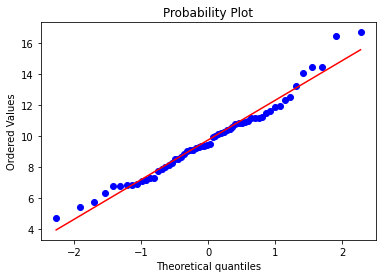

In [36]:
#sqrt normalization 실행 및 p-value 측정, 플롯
df["incentive_sqrt"] = np.sqrt(df["incentive"])
stats.shapiro(df["incentive_sqrt"])
stats.probplot(df["incentive_sqrt"],dist="norm",plot=plt)
#p-value 가 0.05 보다 높으므로 귀무가설 채택 => 데이터는 정규화 되어있다.

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([ 4.69041576,  5.43139025,  5.74456265,  6.32455532,  6.74536878,
          6.78232998,  6.8556546 ,  

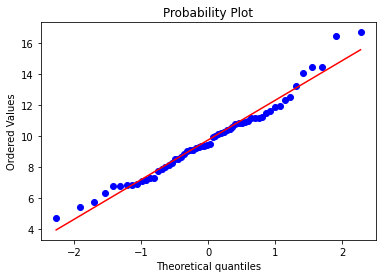

In [37]:
#cuberoot normalization 실행 및 p-value 측정, 플롯
df["incentive_cbrt"] = np.sqrt(df["incentive"])
stats.shapiro(df["incentive_cbrt"])
stats.probplot(df["incentive_cbrt"],dist="norm",plot=plt)
#p-value 가 0.05 보다 높으므로 귀무가설 채택 => 데이터는 정규화 되어있다.

<h3> Binning </h3>
binning 은 연속변수를 이산변수로 바꾸는 작업을 말한다. 예를 들어 나이를 나이 그룹으로 바꾼다던지 하는 것을 Binning 이라고 한다.

In [40]:
df = pd.read_excel("resources/skewness.xlsx")
df["age"].quantile([.0,.25,.5,.75,1])

0.00    18.0
0.25    30.0
0.50    35.5
0.75    43.0
1.00    60.0
Name: age, dtype: float64

In [41]:
bins = [18,30,35.5,43,60]
df["age_binned"] = pd.cut(df['age'],bins)
df["age_binned"].value_counts()

(35.5, 43.0]    184
(18.0, 30.0]    183
(43.0, 60.0]    159
(30.0, 35.5]    157
Name: age_binned, dtype: int64